In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from pca import pca


%matplotlib notebook

In [2]:
df_training =  pd.read_csv("training_set_v1_dr7.csv")
columnsNamesArr = df_training.columns.values
column_names = list(columnsNamesArr)
print(column_names[1:])

['ra', 'dec', 'g-i', 'u-g', 'u-z', 'g-z', 'g-r', 'concentration_index', 'photo_z', 'frac_dev', 'host_galaxy', 'distance', 'axis_ratio', 'category', 'radius', 'magnitude', 'u_mag', 'g_mag', 'i_mag', 'r_mag', 'z_mag', 'link']


In [3]:
features = ['g-i', 'u-g', 'u-z', 'g-z', 'g-r', 'concentration_index', 'photo_z', 'frac_dev', 'axis_ratio','radius', 'magnitude']
print(len(features))
category = df_training['category']

11


In [4]:
x = df_training.loc[:,features].values
y = df_training.loc[:,['category']].values

# Unscaled

In [5]:
pca_12 = PCA(n_components = 11, random_state = 2020)
pca_12.fit(x)
x_pca_12 = pca_12.transform(x)

In [6]:
print("Variance explained by all 12 principal components = ", sum(pca_12.explained_variance_ratio_*100))

Variance explained by all 12 principal components =  100.00000000000001


In [7]:
print(pca_12.explained_variance_ratio_[0]*100)

99.99260864800983


<IPython.core.display.Javascript object>


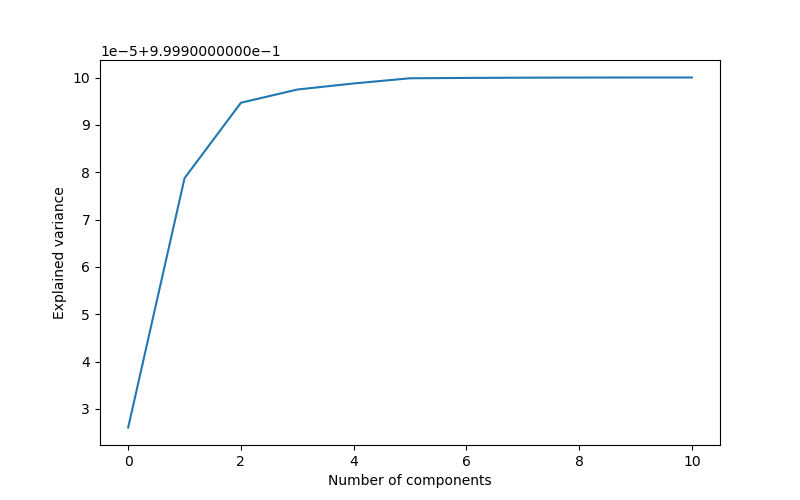

Text(0, 0.5, 'Explained variance')

In [8]:
fig = plt.figure(figsize = (8,5))
plt.plot(np.cumsum(pca_12.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Explained variance')

In [9]:
pca_2 = PCA(n_components = 2, random_state = 2020)
principal_components_2 = pca_2.fit_transform(x)
principal_df_2 = pd.DataFrame(data = principal_components_2, columns = ['Principal Component 1','Principal Component 2'])
final_df_2 = pd.concat([principal_df_2, df_training[['category']]], axis = 1)

<IPython.core.display.Javascript object>


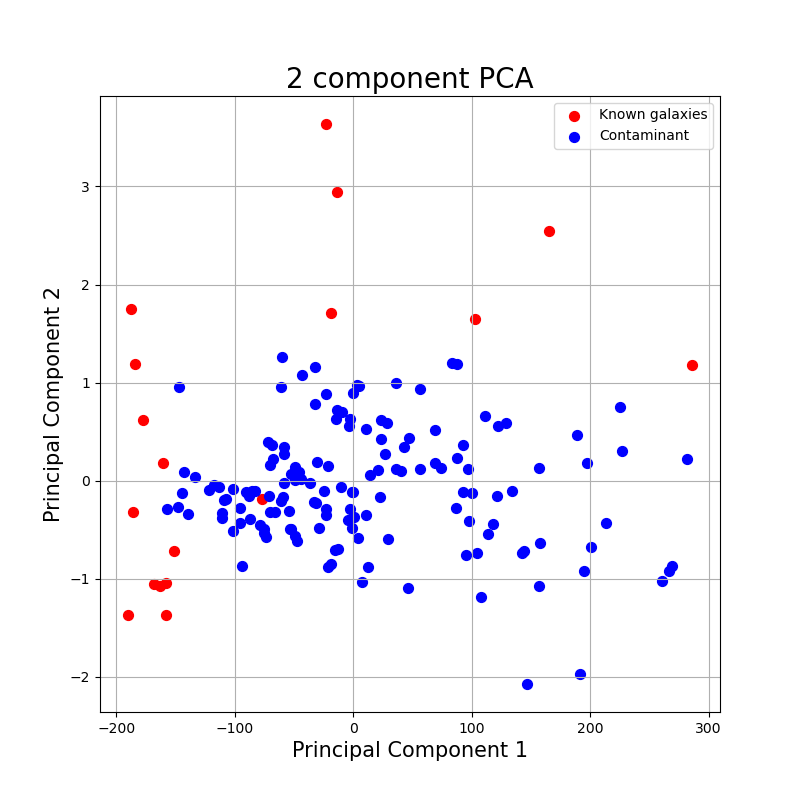

In [10]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = ['Known galaxies','Contaminant']
colors = ['red','blue']
for target, color in zip(targets,colors):
    indicesToKeep = final_df_2['category'] == target
    ax.scatter(final_df_2.loc[indicesToKeep,'Principal Component 1'], final_df_2.loc[indicesToKeep, 'Principal Component 2'], c=color,s=50)
ax.legend(targets)
ax.grid()

In [11]:
pca_3 = PCA(n_components = 3, random_state = 2020)
principal_components_3 = pca_3.fit_transform(x)
principal_df_3 = pd.DataFrame(data = principal_components_3, columns = ['Principal Component 1','Principal Component 2','Principal Component 3'])
final_df_3 = pd.concat([principal_df_3, df_training[['category']]], axis = 1)
print(final_df_3)

     Principal Component 1  Principal Component 2  Principal Component 3  \
0              -186.094297              -0.318940              -0.306230   
1              -158.389317              -1.370027               0.616630   
2              -163.067967              -1.079103               0.663941   
3               -77.292525              -0.187376               0.674103   
4               -22.667468               3.637388               0.604266   
..                     ...                    ...                    ...   
158             121.308840              -0.156533              -0.090467   
159             -44.363958               0.013886              -0.033212   
160             -24.683818              -0.103363              -0.528423   
161             -60.717024               0.957987               0.048026   
162             -23.015869              -0.284420               1.018307   

           category  
0    Known galaxies  
1    Known galaxies  
2    Known galaxies  

<IPython.core.display.Javascript object>


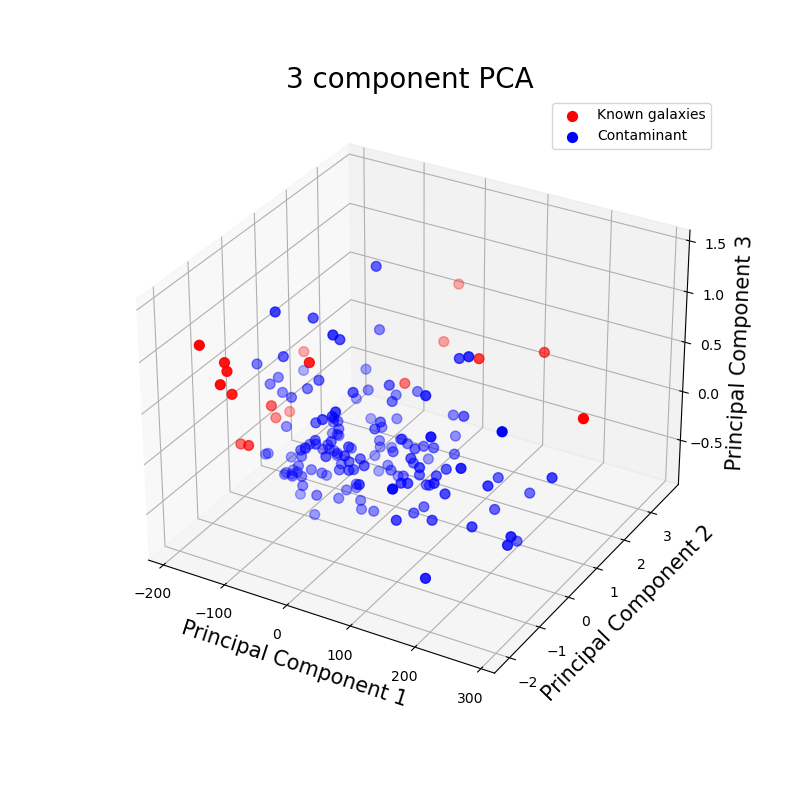

In [12]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(projection='3d')

ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3', fontsize = 15)
ax.set_title('3 component PCA', fontsize = 20)

targets = ['Known galaxies','Contaminant']
colors = ['red','blue']
for target, color in zip(targets,colors):
    indicesToKeep = final_df_3['category'] == target
    ax.scatter(final_df_3.loc[indicesToKeep,'Principal Component 1'], final_df_3.loc[indicesToKeep, 'Principal Component 2'], final_df_3.loc[indicesToKeep,'Principal Component 3'], c=color,s=50)
ax.legend(targets)
ax.grid()

# Scaled

try to make a biplot for PCA
voting methods weighting

In [13]:
x_scaled = StandardScaler().fit_transform(x)

In [14]:
pca_12_scaled = PCA(n_components = 11, random_state = 2020)
pca_12_scaled.fit(x_scaled)
x_pca_12_scaled = pca_12_scaled.transform(x_scaled)

In [15]:
print("Variance explained by all 12 principal components = ", sum(pca_12_scaled.explained_variance_ratio_*100))

Variance explained by all 12 principal components =  99.99999999999997


<IPython.core.display.Javascript object>


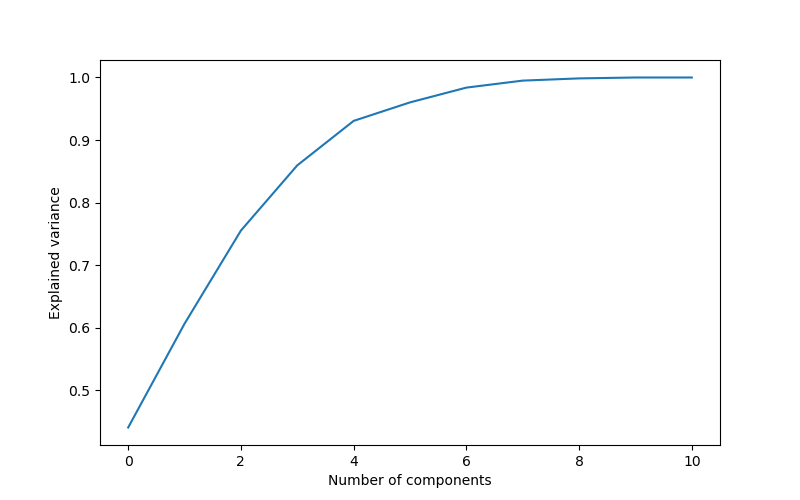

Text(0, 0.5, 'Explained variance')

In [16]:
fig = plt.figure(figsize = (8,5))
plt.plot(np.cumsum(pca_12_scaled.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Explained variance')

In [17]:
pca_2_scaled = PCA(n_components = 2, random_state = 2020)
principal_components_2_scaled = pca_2_scaled.fit_transform(x_scaled)
principal_df_2_scaled = pd.DataFrame(data = principal_components_2_scaled, columns = ['Principal Component 1','Principal Component 2'])
final_df_2_scaled = pd.concat([principal_df_2_scaled, df_training[['category']]], axis = 1)


<IPython.core.display.Javascript object>


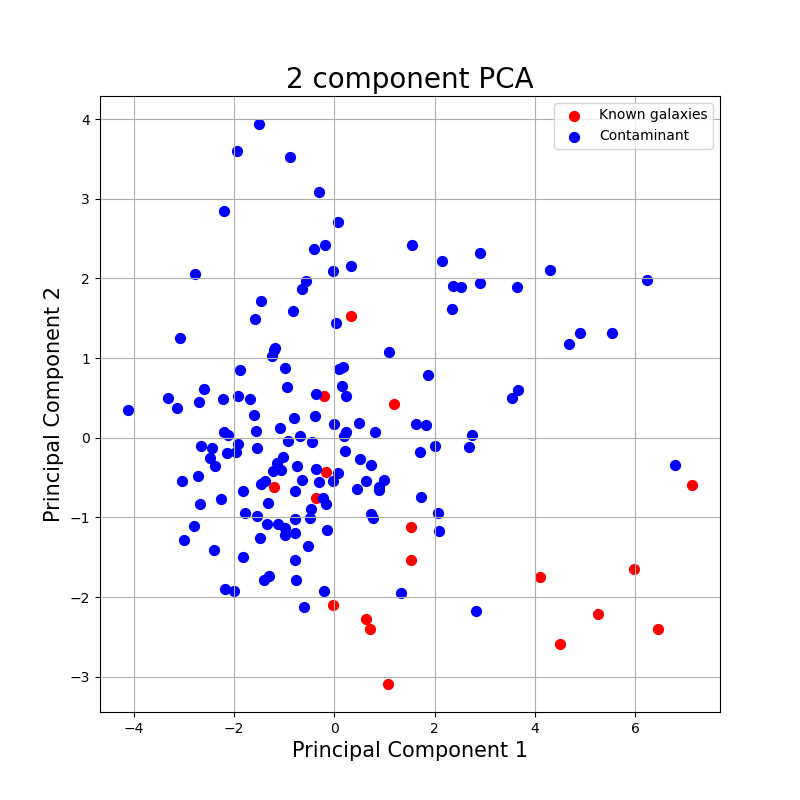

In [18]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = ['Known galaxies','Contaminant']
colors = ['red','blue']
for target, color in zip(targets,colors):
    indicesToKeep = final_df_2_scaled['category'] == target
    ax.scatter(final_df_2_scaled.loc[indicesToKeep,'Principal Component 1'], final_df_2_scaled.loc[indicesToKeep, 'Principal Component 2'], c=color,s=50)
ax.legend(targets)
ax.grid()

In [19]:
pca_3_scaled = PCA(n_components = 3, random_state = 2020)
principal_components_3_scaled = pca_3_scaled.fit_transform(x_scaled)
principal_df_3_scaled = pd.DataFrame(data = principal_components_3_scaled, columns = ['Principal Component 1','Principal Component 2','Principal Component 3'])
final_df_3_scaled = pd.concat([principal_df_3_scaled, df_training[['category']]], axis = 1)
print(final_df_3)

     Principal Component 1  Principal Component 2  Principal Component 3  \
0              -186.094297              -0.318940              -0.306230   
1              -158.389317              -1.370027               0.616630   
2              -163.067967              -1.079103               0.663941   
3               -77.292525              -0.187376               0.674103   
4               -22.667468               3.637388               0.604266   
..                     ...                    ...                    ...   
158             121.308840              -0.156533              -0.090467   
159             -44.363958               0.013886              -0.033212   
160             -24.683818              -0.103363              -0.528423   
161             -60.717024               0.957987               0.048026   
162             -23.015869              -0.284420               1.018307   

           category  
0    Known galaxies  
1    Known galaxies  
2    Known galaxies  

<IPython.core.display.Javascript object>


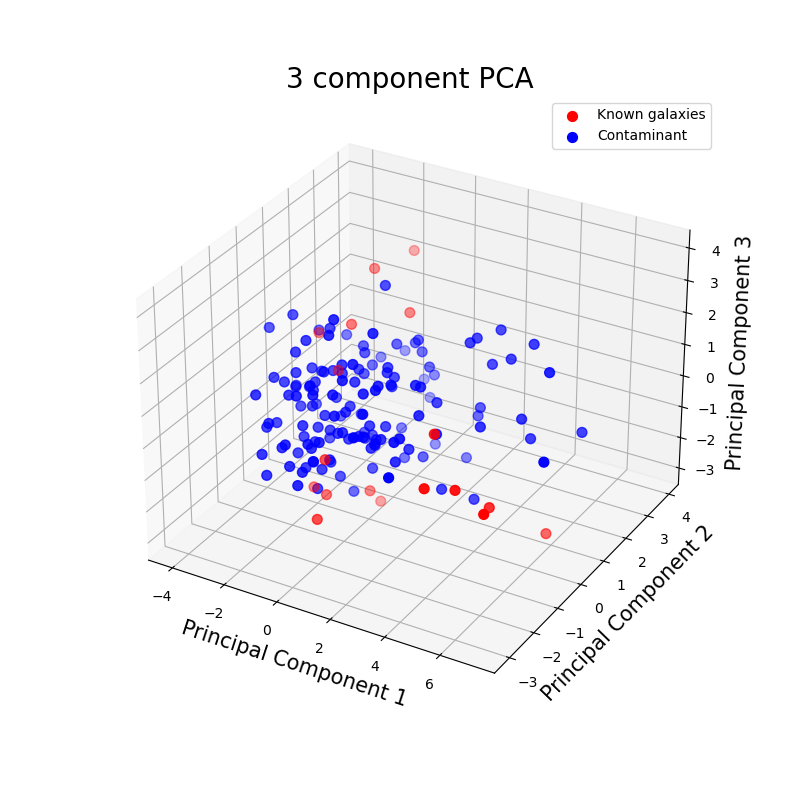

In [20]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(projection='3d')

ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3', fontsize = 15)
ax.set_title('3 component PCA', fontsize = 20)

targets = ['Known galaxies','Contaminant']
colors = ['red','blue']
for target, color in zip(targets,colors):
    indicesToKeep = final_df_3_scaled['category'] == target
    ax.scatter(final_df_3_scaled.loc[indicesToKeep,'Principal Component 1'], final_df_3_scaled.loc[indicesToKeep, 'Principal Component 2'], final_df_3_scaled.loc[indicesToKeep,'Principal Component 3'], c=color,s=50)
ax.legend(targets)
ax.grid()

In [29]:
ax = sns.heatmap(principal_df_2_scaled.components_,
                 cmap='YlGnBu',
                 yticklabels=[ "PCA"+str(x) for x in range(1,principal_df_2_scaled.n_components_+1)],
                 xticklabels=list(principal_df_2_scaled.columns),
                 cbar_kws={"orientation": "horizontal"})
ax.set_aspect("equal")

AttributeError: 'DataFrame' object has no attribute 'components_'

[pca] >Column labels are auto-completed.
[pca] >Row labels are auto-completed.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [11] columns of the input data.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Number of components is [6] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [11] columns of the input dataframe.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[6]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]
[pca] >Plot PC1 vs PC2 with loadings.


<IPython.core.display.Javascript object>


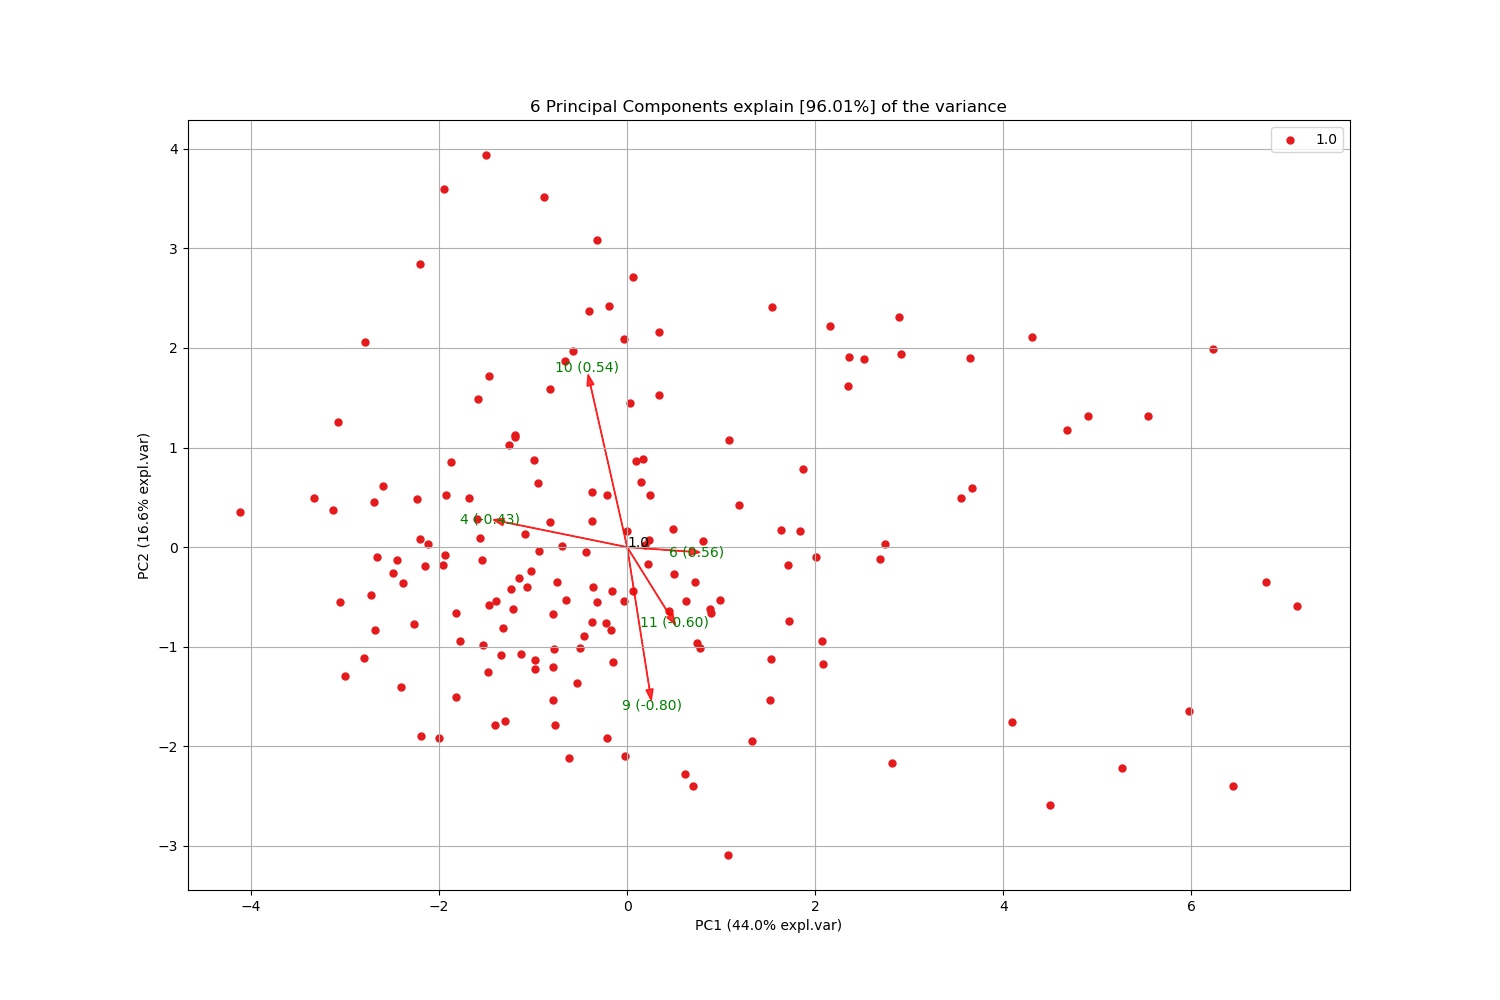

In [25]:
# Initialize to reduce the data up to the number of componentes that explains 95% of the variance.
model = pca(n_components=0.95)

# Or reduce the data towards 2 PCs
# model = pca(n_components=2)

# Fit transform
results = model.fit_transform(x_scaled)

# # Plot explained variance
# fig, ax = model.plot()

# # Scatter first 2 PCs
# fig, ax = model.scatter()

# Make biplot with the number of features
fig, ax = model.biplot(n_feat=5)